# FINAL PROJECT

Người thực hiện

    Họ tên: Nguyễn Đình Tuyên. MSSV: 1712888

    Họ tên: Đặng Đỗ Huỳnh Như. MSSV: 18120219

## Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Thu thập dữ liệu

- Dữ liệu về chủ đề gì và lấy từ nguồn nào?

- Tên Dataset: Data scientist salary.
- Nguồn: Kaggle.
- Tác giả: Nikhil Bhathi.
- Link: https://www.kaggle.com/nikhilbhathi/data-scientist-salary-us-glassdoor?fbclid=IwAR1a7W_NDn-VS416XxzxXS3NsQAm7bf65Qz0M_a63cgOk1hRfvwWDdVfKII
- Chủ đề: Dữ liệu chứa thông tin về các công việc thuộc lĩnh vực data science ở các bang nước Mỹ.

- Dữ liệu có được cho phép sử dụng không? (xem license của dữ liệu)

License của dữ liệu là CC0: Public domain. Do đó, dữ liệu cho phép sử dụng.

- Dữ liệu được người ta thu thập như thế nào?

Dữ liệu được thu thập từ trang web việc làm Glassdoor bằng công cụ Selenium.

## 2. Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
df = pd.read_csv("data_scientist_salary.csv")

In [3]:
df.head(3)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M


In [4]:
df.tail(3)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\r\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC\r\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na
741,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\r\n3.6,"Beavercreek, OH","Arlington, VA",501 - 1000,1967,...,0,0,0,0,0,0,0,other scientist,na,M


Loại bỏ cột index vì ta sẽ tự động pandas sẽ tự đánh số thứ tự cho các dòng dữ liệu.

In [5]:
df = df.drop(columns="index")
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [6]:
num_rows, num_cols = df.shape
print("Dữ liệu gồm:")
print("-", num_rows, "dòng.")
print("-", num_cols, "cột.")

Dữ liệu gồm:
- 742 dòng.
- 41 cột.


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả của tác giả bộ dữ liệu và theo quan sát sơ bộ, dữ liệu một dòng cho biết thông tin của một công việc trong lĩnh vực Data science được đăng tuyển trên trang web việc làm Glassdoor và có vẻ không có dòng nào bị lạc loài.

### Dữ liệu có các dòng bị lặp không?

In [7]:
have_duplicated_rows = df.duplicated().any()
have_duplicated_rows

True

In [8]:
False if len(df[df.duplicated()]) == 0 else True

True

Kết quả của câu lệnh trên cho thấy dữ liệu có các dòng bị lặp.

### Mỗi cột có ý nghĩa gì?

Dưới đây là mô tả của tác giả về các cột trong file "data_scientist_salary.csv":
- **Job Title**: Chức danh của công việc, ví dụ: Data scientist, junior data scientist, senior data scientist, ...
- **Salary Estimate**: Khoảng lương và nguồn lấy thông tin.
- **Job Description**: Mô tả chung về công việc, cho biết các yêu cầu kỹ năng mà công ty mong muốn và những việc mà người trúng tuyển sẽ đảm nhiệm.
- **Rating**: Điểm đánh giá cho công ty.
- **Company name**: Tên công ty.
- **Location**: Địa điểm làm việc.
- **Headquarters**: Địa điểm trụ sở chính của công ty.
- **Size**: Quy mô nhân lực của công ty.
- **Founded**: Năm thành lập công ty.
- **Type of ownership**: Cho biết đây là công ty tư nhân, đại chúng hay thuộc nhà nước.
- **Industry**: Cho biết hoạt động kinh doanh của công ty thuộc ngành công nghiệp nào, ví dụ: công nghệ thông tin, công nghiệp dược phẩm, ...
- **Sector**: Lĩnh vực mà công ty hoạt động.
- **Revenue**: Tổng số doanh thu hàng năm của công ty.
- **Competitors**: Cho biết những đối thủ cạnh tranh hiện tại của công ty.
- **Hourly**: Có giá trị 1 nếu mức lương được báo cáo theo giờ và có giá trị là 0 ở các trường hợp còn lại.
- **Employer provided**: Có giá trị là 1 nếu mức lương được cung cấp bởi nhà tuyển dụng và có giá trị là 0 ở các trường hợp còn lại.
- **Lower Salary**: Mức lương tối thiểu cho công việc này của công ty.
- **Uppper Salary**: Mức lương tối đa cho công việc này của công ty.
- **Avg Salary(K)**: Mức lương trung bình cho công việc này của công ty.
- **company_txt**: Chứa tên công ty.
- **Job Location**: Tên viết tắt của vị trí công ty (bang).
- **Age** Tuổi của công ty (tính theo năm).
- **Python**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng python, ngược lại có giá trị 0
- **spark**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng spark, ngược lại có giá trị 0.
- **aws**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng aws, ngược lại có giá trị 0.
- **excel**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng excel, ngược lại có giá trị 0.
- **sql**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng sql, ngược lại có giá trị 0.
- **sas**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng sas, ngược lại có giá trị 0.
- **keras**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng keras, ngược lại có giá trị 0.
- **pytorch**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng pytorch, ngược lại có giá trị 0.
- **scikit**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng scikit, ngược lại có giá trị 0.
- **tensor**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng tensor, ngược lại có giá trị 0.
- **hadoop**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng hadoop, ngược lại có giá trị 0.
- **tableau**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng tableau, ngược lại có giá trị 0.
- **bi**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng PowerBi, ngược lại có giá trị 0.
- **flink**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng flink, ngược lại có giá trị 0.
- **mongo**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng mongodb, ngược lại có giá trị 0.
- **google_an**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng google analytics, ngược lại có giá trị 0.
- **job_title_sim**: Tên đơn giản của chức danh công việc.
- **seniority_by_title**: Có chữ senior trong chức danh.
- **Degree**: Có giá trị M nếu công việc yêu cầu bằng cấp hoặc số năm kinh nghiệm; có giá trị P trong các trường hợp còn lại.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Lấy giá trị dtype (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong dataframe:

In [9]:
col_dtypes = df.dtypes
col_dtypes

Job Title              object
Salary Estimate        object
Job Description        object
Rating                float64
Company Name           object
Location               object
Headquarters           object
Size                   object
Founded                 int64
Type of ownership      object
Industry               object
Sector                 object
Revenue                object
Competitors            object
Hourly                  int64
Employer provided       int64
Lower Salary            int64
Upper Salary            int64
Avg Salary(K)         float64
company_txt            object
Job Location           object
Age                     int64
Python                  int64
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
keras                   int64
pytorch                 int64
scikit                  int64
tensor                  int64
hadoop                  int64
tableau   

Ta thấy:
- Các cột Size, Revenue có dtype là object thay vì dạng số.
- Cột Salary Estimate, Location chứa nhiều hơn một thông tin.

Do đó, dữ liệu trong các cột này chưa phù hợp để đưa ra các phân tích. Tuy nhiên, ta chưa vội tiền xử lý các cột này, vì ta cần đưa ra câu hỏi trước để quyết định những cột dữ liệu nào cần cho việc trả lời câu hỏi, khi đó ta sẽ tiền xử lý các cột liên quan đến câu hỏi (nhằm tránh tình trạng bỏ thời gian tiền xử lý trước dữ liệu nhưng những cột dữ liệu này lại không cần cho quá trình tìm câu trả lời cho câu hỏi).

Ta cũng nhận thấy có một số cột trùng dữ liệu so với cột khác hoặc dữ liệu của cột đó không chứa thông tin cần thiết cho quá trình phân tích sau này. Do đó, ta loại bỏ các cột này ra khỏi dataframe để tiện cho việc xử lý và phân tích.

#### Vấn đề cần tiền xử lý:

- Loại bỏ các cột bị trùng dữ liệu với cột khác: company_txt (trùng với Company Name).
- Loại bỏ các cột chứa thông tin không cần thiết: Headquarters, Competitors, Hourly, Employer provided.

In [10]:
df = df.drop(columns=["company_txt", "Headquarters", "Competitors", "Hourly", "Employer provided"])
df.shape

(742, 36)

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?
(tính tỉ lệ các giá trị thiếu, min/max của các cột có kiểu dữ liệu dạng số)

Lấy ra các cột có kiểu dữ liệu dạng số:

In [11]:
col_dtypes = df.dtypes
numerical_cols = col_dtypes[col_dtypes != "object"] #vì trong df này chỉ có 3 loại dtype là object, int và float
numerical_cols = list(numerical_cols.index)
numerical_cols

['Rating',
 'Founded',
 'Lower Salary',
 'Upper Salary',
 'Avg Salary(K)',
 'Age',
 'Python',
 'spark',
 'aws',
 'excel',
 'sql',
 'sas',
 'keras',
 'pytorch',
 'scikit',
 'tensor',
 'hadoop',
 'tableau',
 'bi',
 'flink',
 'mongo',
 'google_an']

Theo như tác giả đề cập, các giá trị -1 trong bộ dữ liệu ám chỉ các thông tin không được cung cấp hoặc không thể thu thập bằng selenium. Do đó, ta sẽ thay những giá trị này bằng NaN

In [12]:
df = df.replace(-1, np.nan)

In [13]:
numerical_df = df[numerical_cols]
nume_col_profiles_df = pd.DataFrame(data={"missing_ratio": numerical_df.isnull().mean() * 100,
                       "min": numerical_df.min(),
                       "max": numerical_df.max()})
nume_col_profiles_df = nume_col_profiles_df.T
nume_col_profiles_df

,Rating,Founded,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,excel,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
missing_ratio,1.48248,6.738544,0.0,0.0,0.0,6.738544,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.90000,1744.000000,15.0,16.0,15.5,2.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5.00000,2019.000000,202.0,306.0,254.0,277.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?
(tính tỉ lệ các giá trị thiếu, số lượng các giá trị khác nhau, show một vài giá trị)

Lấy ra các cột dạng categorical:

In [14]:
cate_cols = df.dtypes
cate_cols = cate_cols[cate_cols == "object"]
cate_cols = list(cate_cols.index)
cate_cols

['Job Title',
 'Salary Estimate',
 'Job Description',
 'Company Name',
 'Location',
 'Size',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Job Location',
 'job_title_sim',
 'seniority_by_title',
 'Degree']

Ở cột Location có các giá trị "Unknown", ta thay chúng bằng NaN.Tương tự, ta cũng thay các giá trị "na" và "-1" ở các cột khác bằng NaN.

In [15]:
df = df.replace("Unknown", np.nan)
df = df.replace("na", np.nan)
df = df.replace("-1", np.nan)

In [16]:
cate_df = df[cate_cols]

def remove_nan(col):
    return col[col==col]

values = cate_df.values.T
notnan_values = list(map(remove_nan, values))

cate_col_profiles_df = pd.DataFrame(data={"missing_ratio": cate_df.isnull().mean() * 100,
                       "num_diff_vals": cate_df.nunique(),
                       "diff_vals": list(map(list, map(set, notnan_values)))})

cate_col_profiles_df = cate_col_profiles_df.T

cate_col_profiles_df

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,Job Location,job_title_sim,seniority_by_title,Degree
missing_ratio,0,0,0,0,0,0,0,1.34771,1.34771,0,0,1.34771,69.9461,51.6173
num_diff_vals,264,416,463,343,200,8,9,59,24,13,37,9,2,2
diff_vals,[Senior Data Scientist 4 Artificial Intelligen...,"[$74K-$140K (Glassdoor est.), $31K-$72K (Glass...",[Overview\r\n\r\n\r\nAt Sotheby’s we use data ...,"[Affinity Solutions\r\n2.9, SullivanCotter\r\n...","[Agoura Hills, CA, Fort Lee, NJ, Linthicum, MD...","[51 - 200 , 501 - 1000 , 201 - 500 , unknown, ...","[College / University, Other Organization, Hos...","[Video Games, Transportation Equipment Manufac...","[Finance, Arts, Entertainment & Recreation, In...","[Unknown / Non-Applicable, $10+ billion (USD),...","[MO, MI, WA, CA, IL, UT, NJ, LA, DC, NC, FL, T...","[machine learning engineer, analyst, director,...","[sr, jr]","[P, M]"


In [17]:
cate_col_profiles_df["job_title_sim"].loc["diff_vals"]

['machine learning engineer',
 'analyst',
 'director',
 'data analitics',
 'data engineer',
 'other scientist',
 'Data scientist project manager',
 'data modeler',
 'data scientist']

## 3. Đưa ra các câu hỏi có ý nghĩa cần trả lời

### Câu hỏi 1: 

- Trả lời được có lợi ích gì?

### Câu hỏi 2:

***Những ngành công nghiệp nào tuyển nhiều vị trí liên quan đến khoa học dữ liệu nhất nhất? Liệu mức lương ở các ngành này có khác nhau và đâu là top các ngành có mức lương cao nhất?***

- Trả lời được có lợi ích gì?

Các công việc liên quan đến khoa học dữ liệu không chỉ đòi hỏi nhà khoa học dữ liệu phải có kiến thức chuyên môn về khoa học dữ liệu mà còn đòi hỏi sự hiểu biết về dữ liệu trong lĩnh vực cụ thể mà họ đang nghiên cứu. Do đó, việc tìm hiểu xem các ngành nào tuyển nhiều vị trí liên quan dến khoa học dữ liệu và khám phá sự chênh lệch mức lương ở các ngành có thể giúp người học đưa ra định hướng nghề nghiệp phù hợp trong tương lai. (Ví dụ: nếu muốn làm việc trong lĩnh vực y tế, người học KHDL có thể tìm học các khóa học về xử lý dữ liệu trong ngành y).

Ngoài ra, phân tích còn cung cấp một cái nhìn tổng quan về thực trạng ứng dụng khoa học dữ liệu vào các ngành công nghiệp và đời sống.

### Câu hỏi 3:

***Phân bố việc làm khoa học dữ liệu ở mỗi bang như thế nào? Đâu là top các bang và thành phố có nhiều việc làm liên quan đến khoa học dữ liệu nhất?***

- Trả lời được lợi ích gì?

Việc tìm ra các bang có phân bố việc làm liên quan đến KHDL lớn nhất có thể giúp cho người tìm việc đưa ra quyết định phù hợp về nơi mà họ sẽ định cư. Ví dụ, khi một nhà KHDL muốn chuyển công ty do muốn học hỏi thêm hoặc do không phù hợp với công ty hiện tại, nếu nhà KHDL này ở một bang có nhiều việc làm KHDL, việc chuyển đổi này sẽ diễn ra dễ dàng hơn.

Vì phạm vi của mỗi bang là rất lớn, để thu hẹp hơn, ta đồng thời tìm ra top các thành phố mà có nhiều việc làm về KHDL nhất ở mỗi bang.

## 4. Tiền xử lý và phân tích dữ liệu để trả lời các câu hỏi

## Câu hỏi 1:

### Tiền xử lý
- Các bước thực hiện:

In [18]:
#Code

### Phân tích dữ liệu
- Các bước thực hiện:

In [19]:
#Code

## Câu hỏi 2:

***Những ngành công nghiệp nào tuyển nhiều vị trí liên quan đến khoa học dữ liệu nhất nhất? Liệu mức lương ở các ngành này có khác nhau và đâu là top các ngành có mức lương cao nhất?***

### Tiền xử lý
- Tạo ra một dataframe mới từ các cột Lower Salary, Upper Salary, Avg Salary(K), Industry để phục vụ cho việc phân tích và đưa ra câu trả lời.

In [20]:
sub_df = df[["Lower Salary", "Upper Salary", "Avg Salary(K)", "Industry"]]
sub_df.head(3)

,Lower Salary,Upper Salary,Avg Salary(K),Industry
0,53,91,72.0,Aerospace & Defense
1,63,112,87.5,Health Care Services & Hospitals
2,80,90,85.0,Security Services


### Phân tích dữ liệu

#### Top 5 ngành tuyển dụng nhiều vị trí liên quan đến khoa học dữ liệu nhất và biểu đồ tỉ lệ giữa chúng.

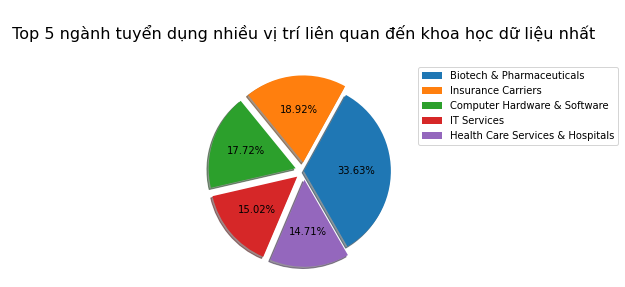

In [21]:
num_jobs_per_industry = sub_df["Industry"].value_counts()

#lấy ra top 5 ngành tuyển dụng nhiều vị trí liên quan đến khdl nhất
top5 = num_jobs_per_industry[:5]

#tính tỉ lệ số công việc ở mỗi ngành
top5_ratio = top5 / top5.sum() * 100

#vẽ biểu đồ tròn để minh họa
my_explode=(0,0.1,0.1,0.1,0.1)
plt.pie(top5_ratio, autopct='%1.2f%%',explode=my_explode, shadow=True,startangle=300)
plt.title('\n Top 5 ngành tuyển dụng nhiều vị trí liên quan đến khoa học dữ liệu nhất \n', size=16, color='black')
plt.legend(labels=list(top5_ratio.index), bbox_to_anchor=(1,1))
plt.show()

Kết quả khá bất ngờ khi 2 ngành chiếm tỉ lệ lớn nhất là Biotech & Pharmaceuticals (công nghệ sinh học & dược phẩm) và Insurance Carriers (Bảo hiểm), trong khi đó các ngành liên quan đến công nghệ thông tin lại xếp thứ 3 và thứ 4.

#### Top 5 ngành có mức lương khoa học dữ liệu cao nhất

Chọn dữ liệu mức lương trung bình ở cột Avg Salary(K) để thực hiện so sánh.

In [22]:
#với mỗi ngành, tính giá trị trung bình (mean) cho mức lương tối thiểu, mức lương tối đa và mức lương trung bình
mean_vals = sub_df[["Industry", "Lower Salary", "Avg Salary(K)", "Upper Salary"]].groupby("Industry").mean()

- Đầu tiên, ta thử khảo sát xem sự chênh lệch mức lương giữa top 5 ngành tuyển dụng nhiều vị trí liên quan đến KHDL nhất ở trên như thế nào.

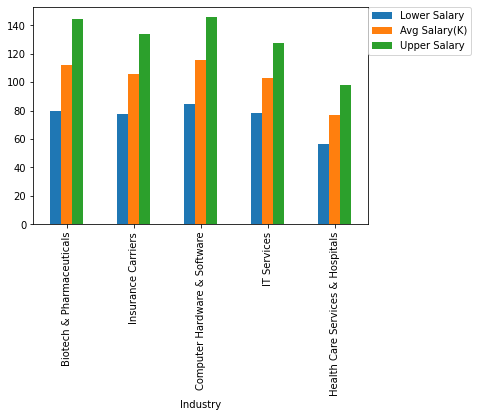

In [23]:
#Lấy ra các giá trị tương ứng với 5 công ty trong top5
top5_with_salary = mean_vals.loc[list(top5.index), :]

axes = top5_with_salary.plot.bar()
axes.legend(loc=(1,0.78))  

Kết quả cho thấy ngành Computer Hardware & Software có mức lương cao nhất (xét trên cả ba giá trị tối thiểu, trung bình và tối đa) trong nhóm top 5 ngành ở trên, trong khi 2 ngành có nhiều việc làm liên quan đến KHDL nhất là Biotech & Phamaceuticals và Insurance Carriers xếp ở sau về mức lương.

- Tiếp theo, ta tìm top 5 ngành có mức lương cao nhất trong tất cả các ngành trong dataset

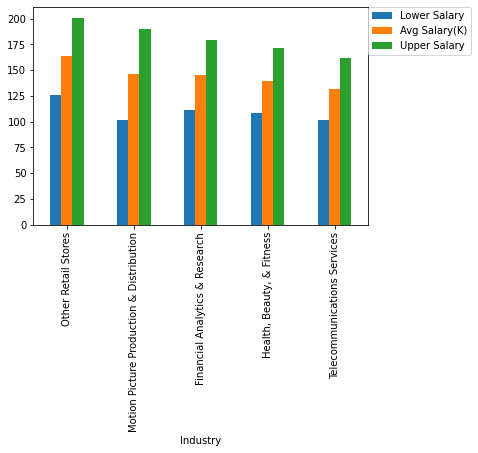

In [24]:
#sắp xếp lại theo mức lương trung bình giảm dần
mean_vals = mean_vals.sort_values(by="Avg Salary(K)", ascending=False)

#Lấy ra 5 công ty có mức lương trung bình cao nhất
top5_general = mean_vals[:5]

axes = top5_general.plot.bar()
axes.legend(loc=(1,0.78))

Kết quả khá bất ngờ khi không có ngành nào trong số top 5 ngành tuyển dụng nhiều nhất nằm trong top 5 ngành có mức lương cao nhất. Một câu hỏi được đặt ra là số lượng việc làm KHDL ở 5 ngành này là bao nhiêu.

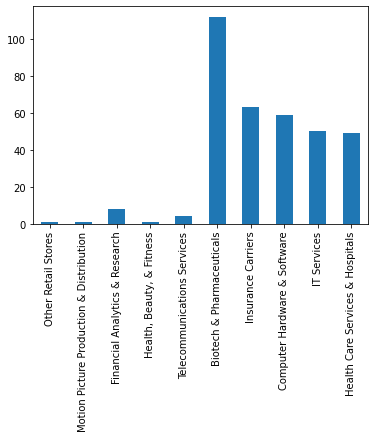

In [25]:
num_jobs_per_industry = sub_df["Industry"].value_counts()

#lấy ra số việc làm ở 5 ngành có mức lương cao nhất
num_jobs = num_jobs_per_industry.loc[list(top5_general.index)]

#thêm vào dữ liệu của 5 ngành có số việc làm cao nhất để tiện quan sát
num_jobs = num_jobs.append(top5)

axes = num_jobs.plot.bar()

Ta thấy rằng số việc làm KHDL ở 5 ngành này là ít hơn rất nhiều so với các ngành trong top 5 ngành tuyển dụng KHDL nhiều nhất. Do đó, người tìm việc cần hết sức cẩn trọng và cân nhắc trước khi lựa chọn lĩnh vực mà mình làm việc.

## Câu hỏi 3:

***Phân bố việc làm khoa học dữ liệu ở mỗi bang như thế nào? Đâu là top các bang và thành phố có nhiều việc làm liên quan đến khoa học dữ liệu nhất?***

### Tiền xử lý

- Tách cột Location ra thành 2 cột tên thành phố (City) và tên bang (State)

In [26]:
#lấy ra cột Location và thực hiện tách cột
sub_df = df["Location"]
sub_df = sub_df.str.split(pat=", ", expand=True)
sub_df.head(3)

,0,1,2
0,Albuquerque,NM,None
1,Linthicum,MD,None
2,Clearwater,FL,None


Cột Location chỉ chứa 2 thông tin là tên thành phố (hoặc tên thị trấn) và tên bang, nhưng kết quả số cột sau khi tách ra từ cột Location lại là 3. Để tìm hiểu điều này, ta in ra tất cả các giá trị khác nhau trong cột thứ 3 này.

In [27]:
sub_df[2].unique()

array([None, 'CA'], dtype=object)

Kết quả cho thấy ngoài các giá trị None, cột này có xuất hiện giá trị "CA". Do đó, ta sẽ tìm tất cả các dòng có giá trị "CA" ở cột thứ 3 này.

In [28]:
sub_df[sub_df[2]=="CA"]

,0,1,2
126,Santa Fe Springs,Los Angeles,CA


Nguyên nhân do Santa Fe Springs là một thành phố nhỏ trong một thành phố lớn hơn là Los Angeles. Để xử lý ngoại lệ này, ta lựa chọn lấy tên thành phố là Los Angeles (vì các dòng dữ liệu khác cũng để tên thành phố là Los Angeles thay vì tên các thành phố nhỏ).

In [29]:
#xóa cột thứ 3 chứa toàn giá trị None
sub_df = sub_df.drop([2], axis=1)

#đổi tên các cột thành "City" và "State"
sub_df.rename(columns={0: "City", 1: "State"}, inplace=True)

#đổi giá trị City và State ở dòng 126 thành Los Angeles và CA
sub_df.iloc[126] = ["Los Angeles", "CA"]

### Phân tích dữ liệu

#### Các bang nào có số lượng việc làm liên quan đến KHDL cao nhất? 

Lấy ra top 5 bang có số lượng việc làm nhiều nhất và vẽ biểu đồ tròn thể hiện tỉ lệ giữa chúng.

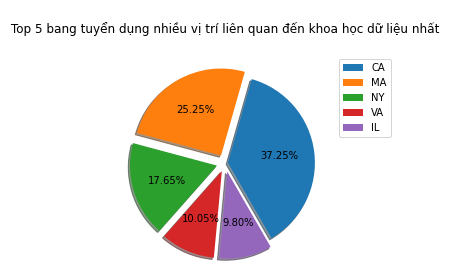

In [38]:
#lấy ra top5
top5_states = sub_df.groupby("State").size().sort_values(ascending=False)[:5]

#tính tỉ lệ giữa các bang trong top 5 
top5_ratio = top5_states / top5_states.sum() * 100

#vẽ biểu đồ tròn để minh họa
my_explode=(0.03, 0.1,0.1,0.1,0.1)
plt.pie(top5_ratio, autopct='%1.2f%%',explode=my_explode, shadow=True,startangle=300)
plt.title('\n Top 5 bang tuyển dụng nhiều vị trí liên quan đến khoa học dữ liệu nhất \n', size=12, color='black')
plt.legend(labels=list(top5_ratio.index), bbox_to_anchor=(1,1))
plt.show()

Kết quả cho thấy 5 bang tuyển dụng nhiều vị trí liên quan đến KHDL nhất lần lượt là California (CA), Massachusetts (MA), New York (NY), Virginia (VA) và Illinois (IL). Trong đó, 2 bang CA và MA chiếm tỉ trọng lớn hơn hẳn các bang còn lại.

#### Ở mỗi bang, các thành phố nào có nhiều việc làm liên quan đến khoa học dữ liệu nhất?

Ở mỗi bang trong top 5 ở trên, lấy ra 3 thành phố có nhiều việc làm khoa học dữ liệu nhất.

In [33]:
#lấy ra các dòng có tên bang nằm trong top 5 bang
top5_df = sub_df[sub_df["State"].isin(list(top5_states.index))]

#tính số lượng việc làm ở mỗi thành phố
top5_df = top5_df.groupby(["State", "City"]).size().reset_index(name="Counts")

#lấy ra 3 thành phố có nhiều việc làm nhất ở mỗi bang
top_cities_states = top5_df.groupby("State").apply(lambda x: (x.sort_values("Counts", ascending=False)).head(3))
top_cities_states = top_cities_states.reset_index(drop=True)
top_cities_states

,State,City,Counts
0,CA,San Francisco,49
1,CA,San Jose,13
2,CA,San Diego,9
3,IL,Chicago,32
4,IL,Hoopeston,4
5,IL,Peoria,2
6,MA,Cambridge,47
7,MA,Boston,23
8,MA,Marlborough,6
9,NY,New York,55


Ta thấy các thành phố có nhiều việc làm nhất ở các bang CA, IL, MA, NY và VG lần lượt là San Francisco, Chicago, Cambridge, New York và Herndon.

Để minh họa kỹ hơn sự chênh lệch giữa các thành phố, vẽ biểu đồ hình cột:

<AxesSubplot:xlabel='City'>

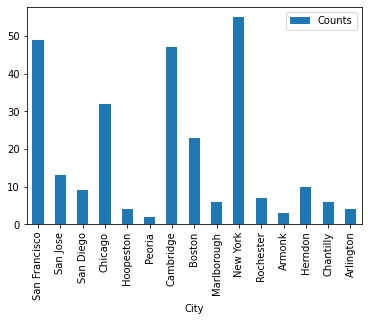

In [35]:
#vẽ biểu đồ cột số lượng việc làm ở mỗi thành phố
top_cities = top_cities_states[["City", "Counts"]]
top_cities = top_cities.set_index("City")
top_cities.plot.bar()

Ta thấy 5 thành phố New York, San Francisco, Cambridge, Chicago và Boston có số lượng việc làm nổi bật hơn nhiều so với các thành phố còn lại. Ngoài ra, biểu đồ còn cho thấy bang MA có đến 2 thành phố nằm trong top 5, thành phố Boston của bang này có số lượng việc làm lớn hơn nhiều so với thành phố có nhiều việc làm nhất bang IL là Herndon.

## 5. Nhìn lại quá trình làm đồ án

- TV1 : Những khó khăn?
        Học được gì?

- TV2: Những khó khăn?
        Học được gì?

- Nhóm: nếu có thêm thời gian thì sẽ làm gì?

## 6. Tài liệu tham khảo